<a href="https://colab.research.google.com/github/Arunsehrawat400/Arun-Qiskit/blob/main/Lattice_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q qiskit qiskit[visualization] qiskit_aer
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall qiskit qiskit_algorithms qiskit_nature -y


Found existing installation: qiskit 1.0.1
Uninstalling qiskit-1.0.1:
  Successfully uninstalled qiskit-1.0.1


In [ ]:
!pip install qiskit==1.0.1
!pip install qiskit_algorithms==0.3.0
!pip install qiskit_nature==0.7.2


  Using cached qiskit-1.0.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached qiskit-1.0.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.7 MB/s eta 0:00:00


In [ ]:
import qiskit
import qiskit_algorithms
import qiskit_nature

print("Qiskit version:", qiskit.__version__)
print("Qiskit Algorithms version:", qiskit_algorithms.__version__)
print("Qiskit Nature version:", qiskit_nature.__version__)



Qiskit version: 1.0.1
Qiskit Algorithms version: 0.3.0
Qiskit Nature version: 0.7.2


### **1. Ground State Energy**

Ground State Energy: -5.072377396570935


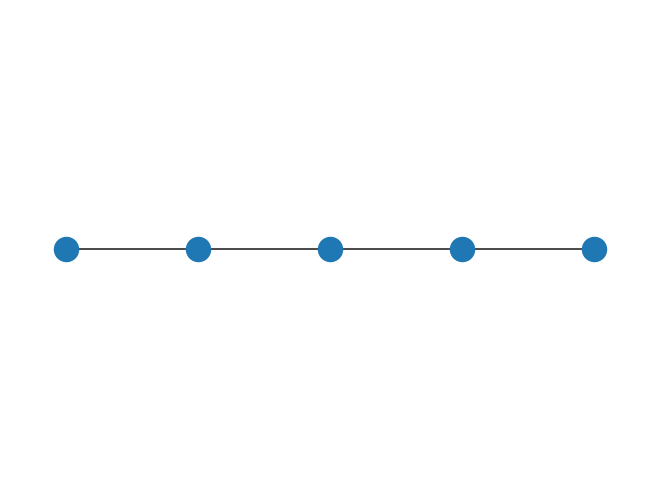

In [ ]:
from qiskit_nature.second_q.hamiltonians.lattices import LineLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.problems import LatticeModelProblem
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

# Define lattice parameters
num_nodes = 5  # Small structure, manageable for quick calculations
boundary_condition = BoundaryCondition.OPEN
t = -1.0  # Interaction parameter (hopping term)
v = 0.0   # Onsite potential
u = 2.0   # Interaction parameter U (Coulomb repulsion)

# Setup lattice and Fermi-Hubbard model
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)
line_lattice.draw()
fhm = FermiHubbardModel(
    line_lattice.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v
    ),
    onsite_interaction=u
)

# Problem setup and solving
lmp = LatticeModelProblem(fhm)
numpy_solver = NumPyMinimumEigensolver()
qubit_mapper = JordanWignerMapper()
calc = GroundStateEigensolver(qubit_mapper, numpy_solver)
res = calc.solve(lmp)

# Display result
print("Ground State Energy:", res.groundenergy)


## for metals

t = -1.0 # (moderate hopping term)

v = 0.0 # (low onsite potential)

u = 0.5 #  (low electron-electron interaction)
### Ground State Energy: -5.072377396570941

## for insulators
t = -0.5 # (reduced hopping term)

v = 1.0 # (higher onsite potential)

u = 3.0 # (strong electron-electron interaction)
### Ground State Energy: 2.958775864788829e-16

## for super-conducting behaviour

t = -1.0 # (significant hopping)

v = 0.1 # (small onsite potential)

u = 1.0 # (moderate interaction)

### Ground State Energy: -4.328187466752253

## for semiconductors
t = -0.8 # (moderate hopping term)

v = 0.5 # (moderate onsite potential)

u = 1.5 # (moderate electron-electron interaction)

### Ground State Energy: -1.5896463443086668

# ***plot of GS energies of different materials***

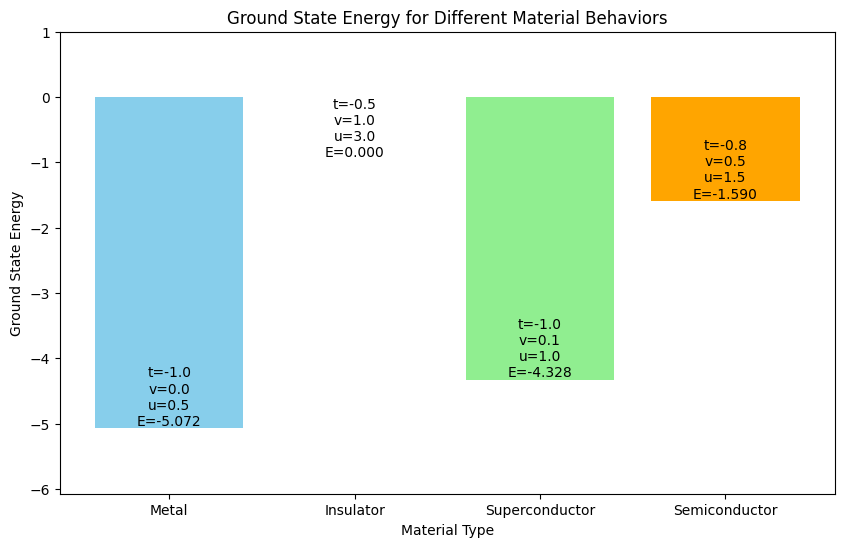

In [ ]:
import matplotlib.pyplot as plt

# Data for the materials
materials = ['Metal', 'Insulator', 'Superconductor', 'Semiconductor']
ground_state_energies = [-5.072, 0.0, -4.328, -1.590]  # Approximated to 3 decimal places for clarity
parameters = [
    {'t': -1.0, 'v': 0.0, 'u': 0.5},
    {'t': -0.5, 'v': 1.0, 'u': 3.0},
    {'t': -1.0, 'v': 0.1, 'u': 1.0},
    {'t': -0.8, 'v': 0.5, 'u': 1.5}
]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(materials, ground_state_energies, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Annotate each bar with (t, v, u) values and ground state energy
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"t={parameters[i]['t']}\nv={parameters[i]['v']}\nu={parameters[i]['u']}\nE={height:.3f}",
        ha='center',
        va='bottom' if height < 0 else 'top',
        color='black'
    )

# Add labels and title
plt.xlabel("Material Type")
plt.ylabel("Ground State Energy")
plt.title("Ground State Energy for Different Material Behaviors")
plt.ylim(min(ground_state_energies) - 1, max(ground_state_energies) + 1)

# Show plot
plt.show()


# **2. Parameter Sweep for Phase Transitions**

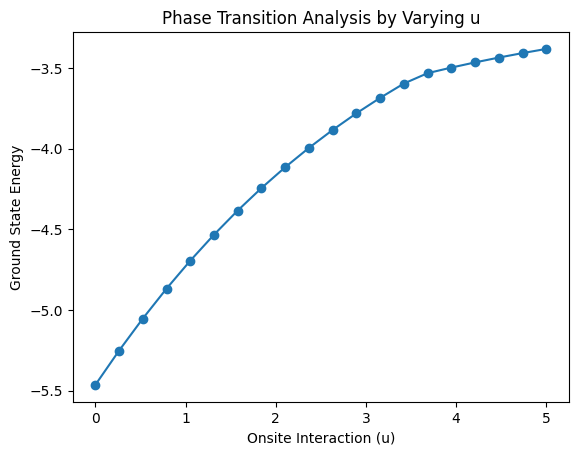

In [ ]:
# Define parameter range for u (onsite interaction)
u_values = np.linspace(0, 5, 20)
ground_state_energies = []

# Loop through different u values and calculate ground state energy
for u in u_values:
    fhm = FermiHubbardModel(
        line_lattice.uniform_parameters(
            uniform_interaction=t,
            uniform_onsite_potential=v
        ),
        onsite_interaction=u
    )
    lmp = LatticeModelProblem(fhm)
    res = calc.solve(lmp)
    ground_state_energies.append(res.groundenergy)

# Plot ground state energy vs. onsite interaction (u)
plt.plot(u_values, ground_state_energies, marker='o')
plt.xlabel("Onsite Interaction (u)")
plt.ylabel("Ground State Energy")
plt.title("Phase Transition Analysis by Varying u")
plt.show()

# **3. Exploring Lattice Size and Geometry**


In [ ]:
# Increase lattice size and switch to periodic boundary conditions
num_nodes = 10
boundary_condition = BoundaryCondition.PERIODIC
line_lattice_large = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

# Recalculate ground state energy with larger lattice
fhm_large = FermiHubbardModel(
    line_lattice_large.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v
    ),
    onsite_interaction=u
)
lmp_large = LatticeModelProblem(fhm_large)
res_large = calc.solve(lmp_large)

print("Ground State Energy for Larger Periodic Lattice:", res_large.groundenergy)


Ground State Energy for Larger Periodic Lattice: -12.944271909999113


# **Varying Node size from 2 to 10 and plotted with their respected GS Energies**

Ground State Energy for 2 nodes: -1.2360679774997902
Ground State Energy for 3 nodes: -3.4641016151377606
Ground State Energy for 4 nodes: -3.6272130052966554
Ground State Energy for 5 nodes: -4.229815082953513
Ground State Energy for 6 nodes: -5.409456845100605
Ground State Energy for 7 nodes: -6.837850951816057
Ground State Energy for 8 nodes: -7.826311280176378
Ground State Energy for 9 nodes: -8.541978691495649
Ground State Energy for 10 nodes: -9.224695045183132


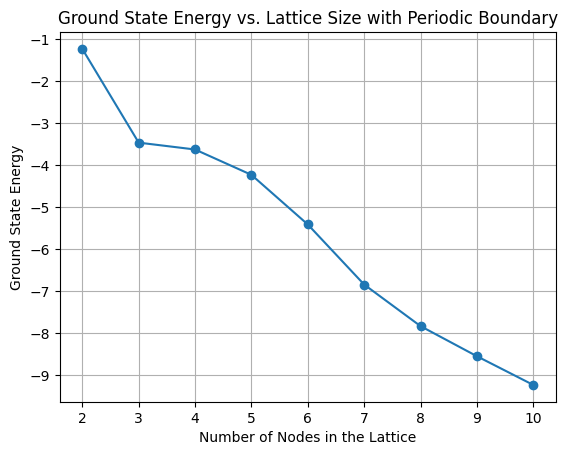

In [ ]:
from qiskit_nature.second_q.hamiltonians.lattices import LineLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.problems import LatticeModelProblem
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import numpy as np
import matplotlib.pyplot as plt

# Define interaction parameters
t = -1.0  # Hopping term
v = 0.0   # Onsite potential
u = 2.0   # Onsite interaction (Coulomb repulsion)

# Initialize solver
numpy_solver = NumPyMinimumEigensolver()
qubit_mapper = JordanWignerMapper()
calc = GroundStateEigensolver(qubit_mapper, numpy_solver)

# Range of num_nodes for the lattice sizes to explore
num_nodes_range = range(2, 11, 1)

# List to store ground state energies for each lattice size
ground_state_energies = []

# Loop over lattice sizes
for num_nodes in num_nodes_range:
    boundary_condition = BoundaryCondition.PERIODIC
    line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

    # Set up Fermi-Hubbard model for the given lattice
    fhm = FermiHubbardModel(
        line_lattice.uniform_parameters(
            uniform_interaction=t,
            uniform_onsite_potential=v
        ),
        onsite_interaction=u
    )

    # Set up lattice problem and solve for ground state
    lmp = LatticeModelProblem(fhm)
    res = calc.solve(lmp)

    # Store the ground state energy
    ground_state_energies.append(res.groundenergy)
    print(f"Ground State Energy for {num_nodes} nodes: {res.groundenergy}")

# Plot the results
plt.plot(num_nodes_range, ground_state_energies, marker='o')
plt.xlabel("Number of Nodes in the Lattice")
plt.ylabel("Ground State Energy")
plt.title("Ground State Energy vs. Lattice Size with Periodic Boundary")
plt.grid(True)
plt.show()


# **4. Electron Density Calculations**

In [ ]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.primitives import Sampler
import numpy as np

# Define lattice parameters (example)
num_nodes = 5  # Adjust this as necessary

# Define operator for electron density on each site
density_operators = []
for i in range(num_nodes):
    # Create a Pauli operator for density at site i
    # Correct the construction of the SparsePauliOp
    density_op = SparsePauliOp.from_list([(Pauli('I' * i + 'Z' + 'I' * (num_nodes - i - 1)), 1.0)])
    density_operators.append(density_op)

# Initialize sampler to calculate expectation values
# Ensure you define your backend for the sampler
backend = 'your_backend_here'  # Replace with your actual backend
sampler = Sampler(backend)

# Calculate expectation values (electron densities) on each site
electron_densities = []
for op in density_operators:
    # Sample the expectation value using the sampler
    # Note: Expectation value may need to be calculated in a different way depending on your setup
    # This line may require modifications based on the Sampler API
    expectation = sampler.expectation_value(op, res.eigenstate)  # Correct this if necessary
    electron_densities.append(expectation.real)

print("Electron Densities:", electron_densities)


ValueError: setting an array element with a sequence

# **5. Excited State Calculations**

In [ ]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_nature.operators.second_quantization import FermionicHamiltonian

# Example Hamiltonian (you need to modify this based on your system)
hamiltonian_terms = {
    'X': 1.0,   # Pauli term
    'Y': 0.5,
    'Z': 0.1,
    # Add more terms as needed
}
fhm_secondq = FermionicHamiltonian(hamiltonian_terms)

from qiskit_algorithms import NumPyEigensolver

# Set up eigensolver for calculating multiple energy states
eigensolver = NumPyEigensolver(k=2)  # Retrieve ground and first excited state
eigenvalues = eigensolver.compute_eigenvalues(fhm_secondq).eigenvalues

# Display energy gap between ground and first excited state
ground_state_energy = eigenvalues[0].real
first_excited_energy = eigenvalues[1].real
energy_gap = first_excited_energy - ground_state_energy

print("Ground State Energy:", ground_state_energy)
print("First Excited State Energy:", first_excited_energy)
print("Energy Gap:", energy_gap)




NameError: name 'FermionicHamiltonian' is not defined

# **6. Ground state Energy for 2-Dimension Material**

Ground State Energy: -3.6272130052966642


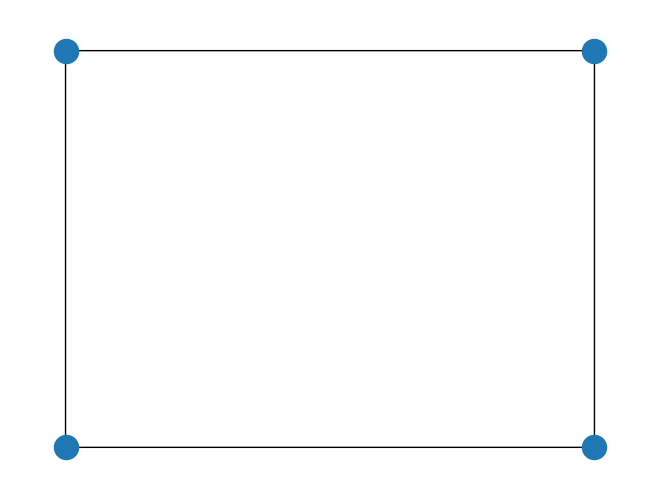

In [ ]:
from qiskit_nature.second_q.hamiltonians.lattices import SquareLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.problems import LatticeModelProblem
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

# Define lattice parameters
rows = 2
cols = 2
boundary_condition = BoundaryCondition.OPEN

t = -1.0  # Interaction parameter (hopping term)
v = 0.0    # Onsite potential
u = 2.0    # Interaction parameter U (Coulomb repulsion)

# Setup square lattice and Fermi-Hubbard model
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)
square_lattice.draw()
fhm = FermiHubbardModel(
    square_lattice.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v
    ),
    onsite_interaction=u
)

# Problem setup and solving
lmp = LatticeModelProblem(fhm)
numpy_solver = NumPyMinimumEigensolver()
qubit_mapper = JordanWignerMapper()
calc = GroundStateEigensolver(qubit_mapper, numpy_solver)
res = calc.solve(lmp)

# Display result
print("Ground State Energy:", res.groundenergy)

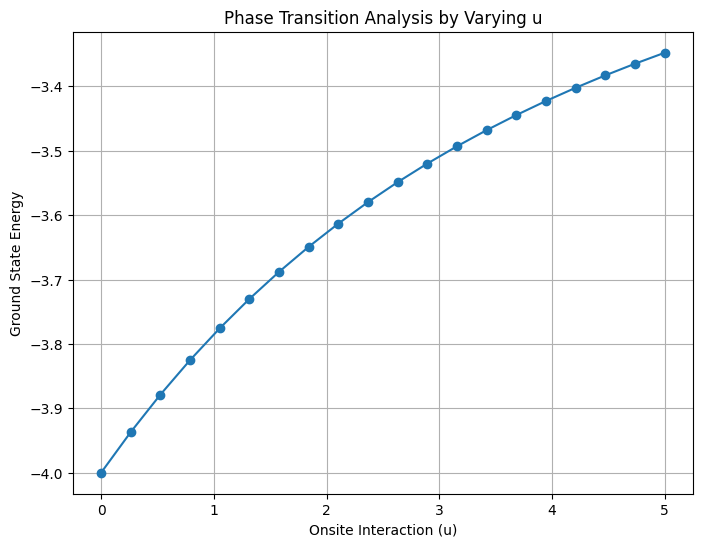

In [12]:
from qiskit_nature.second_q.hamiltonians.lattices import SquareLattice, BoundaryCondition
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.problems import LatticeModelProblem
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np
import matplotlib.pyplot as plt

# Define lattice parameters
rows = 2
cols = 2
boundary_condition = BoundaryCondition.OPEN

t = -1.0  # Interaction parameter (hopping term)
v = 0.0   # Onsite potential

# Set up the square lattice
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

# Initialize solver and mapper for the ground state problem
numpy_solver = NumPyMinimumEigensolver()
qubit_mapper = JordanWignerMapper()

# Varying on-site interaction parameter u
u_values = np.linspace(0, 5, 20)  # Range of u from 0 to 5, with 20 steps
ground_state_energies = []

for u in u_values:
    # Setup Fermi-Hubbard model with current u
    fhm = FermiHubbardModel(
        square_lattice.uniform_parameters(
            uniform_interaction=t,
            uniform_onsite_potential=v
        ),
        onsite_interaction=u
    )

    # Problem setup and solving
    lmp = LatticeModelProblem(fhm)
    calc = GroundStateEigensolver(qubit_mapper, numpy_solver)
    res = calc.solve(lmp)

    # Collect the ground state energy
    ground_state_energies.append(res.groundenergy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(u_values, ground_state_energies, marker='o')
plt.xlabel("Onsite Interaction (u)")
plt.ylabel("Ground State Energy")
plt.title("Phase Transition Analysis by Varying u")
plt.grid()
plt.show()


# **7. Ground state Energy for 3-Dimension Material**

Ground State Energy for 3D lattice: -8.478303296869575


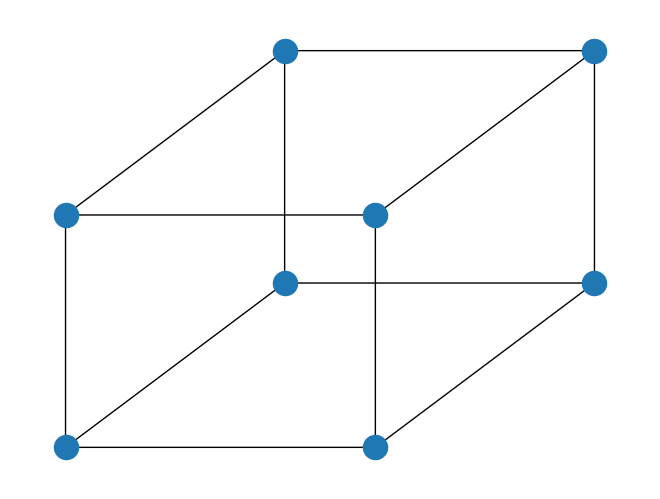

In [22]:
import numpy as np
from math import pi
from qiskit_nature.second_q.hamiltonians.lattices import HyperCubicLattice, BoundaryCondition, LatticeDrawStyle
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.problems import LatticeModelProblem
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

# Define 3D lattice parameters
import resource

size = (2, 2, 2)  # Dimensions of the 3D lattice
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
)

t = -1.0  # Hopping term
v = 0.0   # Onsite potential
u = 2.0   # Coulomb repulsion

# Function to map index to 3D coordinates
def indextocoord_3d(index: int, size: tuple, angle) -> list:
    z = index // (size[0] * size[1])
    a = index % (size[0] * size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x * vec_x + y * vec_y + z * vec_z
    return return_coord.tolist()

# Define position dictionary for drawing the lattice
pos = dict([(index, indextocoord_3d(index, size, angle=pi / 4)) for index in range(np.prod(size))])

# Setup cubic lattice and Fermi-Hubbard model for a 3D system
cubic_lattice = HyperCubicLattice(size=size, boundary_condition=boundary_condition)
cubic_lattice.draw(style=LatticeDrawStyle(pos=pos))

fhm = FermiHubbardModel(
    cubic_lattice.uniform_parameters(
        uniform_interaction=t,
        uniform_onsite_potential=v
    ),
    onsite_interaction=u
)

# Problem setup and solving
lmp = LatticeModelProblem(fhm)
numpy_solver = NumPyMinimumEigensolver()
qubit_mapper = JordanWignerMapper()
calc = GroundStateEigensolver(qubit_mapper, numpy_solver)
res = calc.solve(lmp)

# Display result
print("Ground State Energy for 3D lattice:", res.groundenergy)


# All Above and more properties Could be studied for 2D and 3D materials in future